## TP RBM

Implementation of a Resctricted Boltzmann Machine. You will need to code the following functions
  * **sigmoid** : return the sigmoid function
  * **SampleHiddens** : given a RBM (weight matrix and local biases), and a set of visible configuration, return new samples for the hidden nodes according to $p(\vec{\sigma}|\vec{s})$
  * **SampleVisibles** : given a RBM (weight matrix and local biases), and a set of hidden configuration, return new samples for the visible nodes according to $p(\vec{s}|\vec{\sigma})$
  * **Sampling** : given a RBM and a set of visible configurations, return a set of samples after t steps. It will be important to return the set of visible/hidden configuration AND the magnetisations
  

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# Loading artificial dataset !
X = np.genfromtxt('art4clus.d')
u,s,v = np.linalg.svd(X/X.shape[1]**0.5)
Xsc = np.matmul(X.T,u)

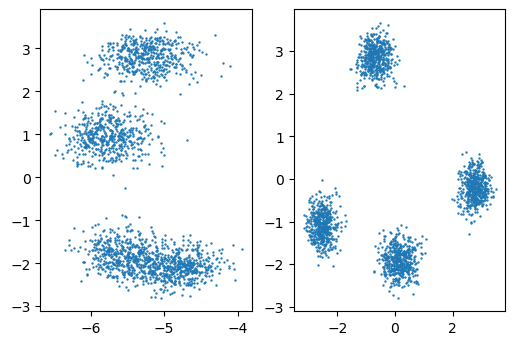

In [5]:
f,ax = plt.subplots(1,2,dpi=100)
ax[0].scatter(Xsc[:,0],Xsc[:,1],s=0.5)
ax[1].scatter(Xsc[:,2],Xsc[:,3],s=0.5)

In [6]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [7]:
# X is Nv X M
# W is Nh x Nv
def SampleHiddens(X,W,b):
    mh = sigmoid(np.matmul(W,X) + b.reshape(W.shape[0],1))
    h = (np.random.random(mh.shape) < mh)*1
    return h,mh

In [8]:
# H is Nh X M
# W is Nh x Nv
def SampleVisibles(H,W,a):
    mv = sigmoid(np.matmul(W.T,H) + a.reshape(W.shape[1],1))
    v = (np.random.random(mv.shape) < mv)*1
    return v,mv

In [21]:
def GetAv(Xchain,W,a,b,it_max=20):
    v_init = np.copy(Xchain)
    h,mh_pos = SampleHiddens(v_init,W,b)
    v,mv = SampleVisibles(h,W,a)
    
    #h,mh =  = SampleHiddens(v,W,b)
    #v,mv = SampleVisibles(h,W,a)
    
    for t in range(1,it_max):
        h,mh = SampleHiddens(v,W,b)
        v,mv = SampleVisibles(h,W,a)
        
    return v_init,mh_pos,v,h

In [10]:
def Sampling(X,W,a,b,it_max=20):
    h,mh = SampleHiddens(X,W,b)
    v,mv = SampleVisibles(h,W,a)
    
    h,mh = SampleHiddens(v,W,b)
    v,mv = SampleVisibles(h,W,a)
    
    for t in range(it_max):
        h,mh = SampleHiddens(v,W,b)
        v,mv = SampleVisibles(h,W,a)
        
    return v,mv,h,mh

In [11]:
def updateWeights(v_pos,h_pos,v_neg,h_neg,W,a,b,lr):
    W += lr*(np.matmul(h_pos,v_pos.T) - np.matmul(h_neg,v_neg.T)) / v_pos.shape[1]
    a += lr*(np.sum(v_pos,axis=1) - np.sum(v_neg,axis=1)) / v_pos.shape[1]
    b += lr*(np.sum(h_pos,axis=1) - np.sum(h_neg,axis=1)) / h_pos.shape[1]

In [13]:
def fit_batch(X,Xchain,W,a,b,lr,it_max=20):
    _, h_pos = SampleHiddens(X,W,b)
    _,_,Xchain,h = GetAv(Xchain,W,a,b,it_max=it_max)
    updateWeights(X,h_pos,Xchain,h,W,a,b,lr)
    return Xchain

In [15]:
# implement batches
def getMiniBatches(X,m,bs):
    return X[:,m*bs:(m+1)*bs]

In [46]:
# init
Nv = X.shape[0]
Nh = 50
bs = 25
NB = int(X.shape[1]/bs)
W = np.random.normal(0,1e-4,size=(Nh,Nv))
a = np.zeros(Nv)
b = np.zeros(Nh)
Xchain = np.random.random((Nv,bs))
lr = 0.05
t_max = 100

for t in range(t_max):
    print(t)
    for m in range(NB):
        Xb = getMiniBatches(X,m,bs)
        Xchain = fit_batch(Xb,Xchain,W,a,b,lr,it_max=20)

#for m in range(NB):
#    Xb = getMiniBatches(X,m,bs)
#    Xchain = fit_batch_fields(Xb,Xchain,W,a,b,lr)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


In [47]:
VisInit = np.random.random((Nv,2000))
Xgen,_,_,_ = Sampling(VisInit,W,a,b,it_max=1000)

In [53]:
u,s,v = np.linalg.svd(W)
Xsc = np.matmul(X.T,v)
Xsc_gen = np.matmul(Xgen.T,v)

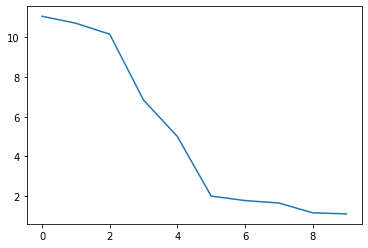

In [49]:
plt.plot(s[:10])

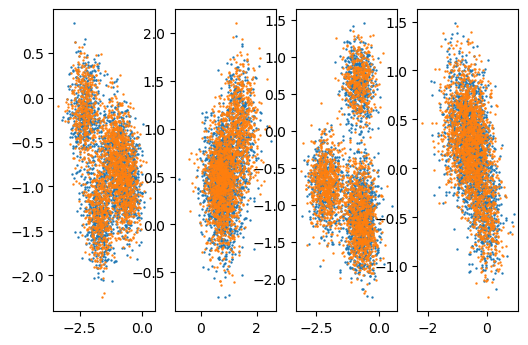

In [58]:
f,ax = plt.subplots(1,4,dpi=100)
ax[0].scatter(Xsc[:,0],Xsc[:,1],s=0.5)
ax[1].scatter(Xsc[:,2],Xsc[:,3],s=0.5)
ax[2].scatter(Xsc[:,4],Xsc[:,5],s=0.5)
ax[3].scatter(Xsc[:,6],Xsc[:,7],s=0.5)
ax[0].scatter(Xsc_gen[:,0],Xsc_gen[:,1],s=0.5)
ax[1].scatter(Xsc_gen[:,2],Xsc_gen[:,3],s=0.5)
ax[2].scatter(Xsc_gen[:,4],Xsc_gen[:,5],s=0.5)
ax[3].scatter(Xsc_gen[:,6],Xsc_gen[:,7],s=0.5)

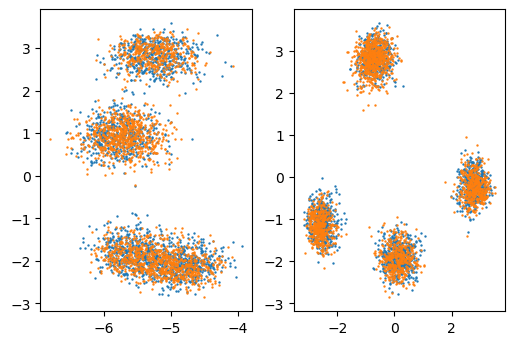

In [52]:
ux,sx,vx = np.linalg.svd(X/X.shape[1]**0.5)

Xsc = np.matmul(X.T,ux)
Xsc_gen = np.matmul(Xgen.T,ux)

f,ax = plt.subplots(1,2,dpi=100)
ax[0].scatter(Xsc[:,0],Xsc[:,1],s=0.5)
ax[1].scatter(Xsc[:,2],Xsc[:,3],s=0.5)
ax[0].scatter(Xsc_gen[:,0],Xsc_gen[:,1],s=0.5)
ax[1].scatter(Xsc_gen[:,2],Xsc_gen[:,3],s=0.5)

In [59]:
import pickle
import gzip
import numpy as np
import matplotlib.pyplot as pp

f = gzip.open('../../M1Pro-ML/mnist.pkl.gz', 'rb')
u = pickle._Unpickler(f)
u.encoding = 'latin1'
p = u.load()
train_set, _, _ = p

X = train_set[0][:10000,:].T